# Notebook 01: 4-Qubit Circuit Build and Hadamard Interference (STEP C)


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
from qiskit.quantum_info import Statevector
import pickle
import os

# Set random seed for reproducibility
np.random.seed(42)


## Step 1: Load Preprocessed Data

In [35]:
# Load processed data from notebook 00
data_path = '../Data/Processed/toy_encoded_data_4qubit.pkl'

with open(data_path, 'rb') as f:
    processed_data = pickle.load(f)

# Extract preprocessed data
P1 = processed_data['P1']  # label=1 (survived)
P2 = processed_data['P2']  # label=0 (died)
P3 = processed_data['P3']  # label=? (to predict)
amplitude_vector = processed_data['amplitude_vector']
alpha = processed_data['alpha']

print("✓ Data loaded successfully!")
print("="*60)
print(f"P1 (survived): {P1}")
print(f"P2 (died):     {P2}")
print(f"P3 (unknown):  {P3}")
print(f"\nAmplitude vector: {len(amplitude_vector)} elements")
print(f"Normalization factor α: {alpha:.4f}")
print("="*60)

✓ Data loaded successfully!
P1 (survived): [0.91925687 0.39365824]
P2 (died):     [0.14109213 0.98999647]
P3 (unknown):  [0.86695433 0.49838759]

Amplitude vector: 16 elements
Normalization factor α: 0.5000


## Step 2: Build 4-Qubit Quantum Circuit (STEP C)

**Circuit Requirements:**
- Exactly **4 qubits** (q0: ancilla, q1-q2: features, q3: label)
- Initializin with 16-element amplitude vector
- Apply **1 Hadamard gate** on q0 (ancilla) ONLY
- Measure q0 (for post-selection) and q3 (for classification)

✓ 4-Qubit Circuit Built!
  Qubits: 4
  Classical bits: 2
  Hadamard gates: 1 (on q0)
  Measurements: 2 (q0 and q3)


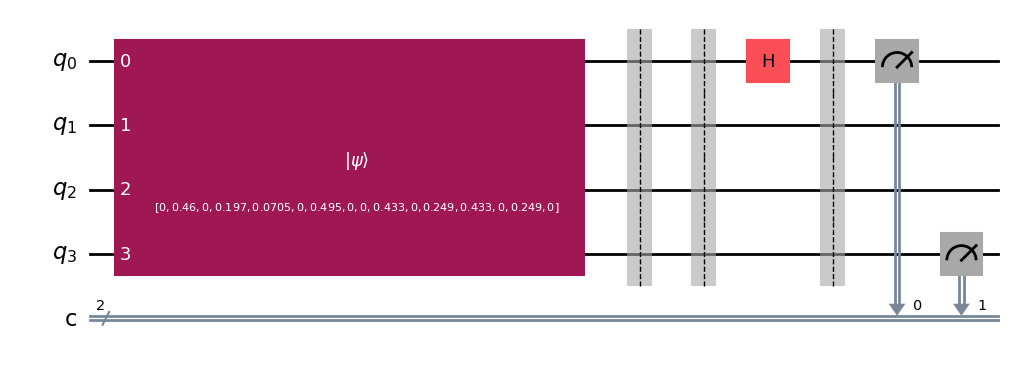

In [37]:
# Create 4-qubit circuit
q = QuantumRegister(4, 'q')
c = ClassicalRegister(2, 'c')  # c[0] stores q0 measurement, c[1] stores q3 measurement
qc = QuantumCircuit(q, c)

# Step 1: Initialize with amplitude vector
qc.initialize(amplitude_vector, q)
qc.barrier()

# Step 2: Apply Hadamard on q0 ONLY (STEP C - creates interference)
qc.barrier()
qc.h(q[0])
qc.barrier()

# Step 3: Measure q0 (ancilla) for post-selection
qc.measure(q[0], c[0])

# Step 4: Measure q3 (label qubit) for classification
qc.measure(q[3], c[1])

print("✓ 4-Qubit Circuit Built!")
print("="*60)
print(f"  Qubits: {qc.num_qubits}")
print(f"  Classical bits: {qc.num_clbits}")
print(f"  Hadamard gates: 1 (on q0)")
print(f"  Measurements: 2 (q0 and q3)")
print("="*60)

# Display circuit
qc.draw(output='mpl')

## Step 5: Save Circuit for Next Notebook

Save the quantum circuit and related data for measurement and classification.

In [38]:
# Extract statevectors using Qiskit Statevector class
print("\\nExtracting State Vectors:")
print("="*60)

# Create circuit for initial state (before Hadamard)
qc_before = QuantumCircuit(4)
qc_before.initialize(amplitude_vector, range(4))
sv_before = Statevector(qc_before)

# Create circuit for state after Hadamard
qc_after = QuantumCircuit(4)
qc_after.initialize(amplitude_vector, range(4))
qc_after.h(0)
sv_after = Statevector(qc_after)

print("\\nState Analysis:")
print("="*60)
print("\\n📊 STATE 1: Initial State (After Amplitude Encoding)")
print("Non-zero amplitudes:")
for i, amp in enumerate(sv_before.data):
    if np.abs(amp) > 1e-10:
        print(f"  |{i:04b}⟩: {amp.real:+.4f}")

print("\\n📊 STATE 2: After Hadamard on q0 (Interfered State)")
print("Non-zero amplitudes:")
for i, amp in enumerate(sv_after.data):
    if np.abs(amp) > 1e-10:
        print(f"  |{i:04b}⟩: {amp.real:+.4f}")

print("\\n✓ Hadamard creates interference:")
print("   - q0=0 block: Constructive interference (sums of amplitudes)")
print("   - q0=1 block: Destructive interference (differences of amplitudes)")
print("   - Post-selection keeps only q0=0 block for classification")
print("="*60)

\nExtracting State Vectors:
\nState Analysis:
\n📊 STATE 1: Initial State (After Amplitude Encoding)
Non-zero amplitudes:
  |0001⟩: +0.4596
  |0011⟩: +0.1968
  |0100⟩: +0.0705
  |0110⟩: +0.4950
  |1001⟩: +0.4335
  |1011⟩: +0.2492
  |1100⟩: +0.4335
  |1110⟩: +0.2492
\n📊 STATE 2: After Hadamard on q0 (Interfered State)
Non-zero amplitudes:
  |0000⟩: +0.3250
  |0001⟩: -0.3250
  |0010⟩: +0.1392
  |0011⟩: -0.1392
  |0100⟩: +0.0499
  |0101⟩: +0.0499
  |0110⟩: +0.3500
  |0111⟩: +0.3500
  |1000⟩: +0.3065
  |1001⟩: -0.3065
  |1010⟩: +0.1762
  |1011⟩: -0.1762
  |1100⟩: +0.3065
  |1101⟩: +0.3065
  |1110⟩: +0.1762
  |1111⟩: +0.1762
\n✓ Hadamard creates interference:
   - q0=0 block: Constructive interference (sums of amplitudes)
   - q0=1 block: Destructive interference (differences of amplitudes)
   - Post-selection keeps only q0=0 block for classification


In [39]:
# Save circuit and related data
circuit_data = {
    'quantum_circuit': qc,
    'amplitude_vector': amplitude_vector,
    'P1': P1,
    'P2': P2,
    'P3': P3,
    'alpha': alpha,
    'n_qubits': 4,
    'statevector_before': sv_before.data,
    'statevector_after': sv_after.data
}

output_path = '../Data/Processed/circuit_4qubit.pkl'
with open(output_path, 'wb') as f:
    pickle.dump(circuit_data, f)

print(f"✓ Circuit data saved to {output_path}")
print("\n" + "="*60)
print("CIRCUIT BUILD COMPLETE!")
print("="*60)
print("\nNext steps (Notebook 02):")
print("  1. Execute circuit with many shots")
print("  2. Apply post-selection (keep only q0=0)")
print("  3. Measure q3 for classification")
print("  4. Compare with book's expected output (p_survive≈0.552)")
print("="*60)

✓ Circuit data saved to ../Data/Processed/circuit_4qubit.pkl

CIRCUIT BUILD COMPLETE!

Next steps (Notebook 02):
  1. Execute circuit with many shots
  2. Apply post-selection (keep only q0=0)
  3. Measure q3 for classification
  4. Compare with book's expected output (p_survive≈0.552)


## Step 3: Visualize Circuit Diagram

## Step 4: Analyze State Before and After Hadamard

Examine how the Hadamard gate creates interference between amplitude blocks.

\nQuantum Circuit Diagram:
✓ Circuit diagram saved to Figures/
\nCircuit Specification:
  ✓ 4 qubits (q0: ancilla, q1-q2: features, q3: label)
  ✓ 1 Hadamard gate (on q0 only)
  ✓ 2 measurements (q0 for post-selection, q3 for classification)
  ✓ State initialized with 16-element amplitude vector (α=1/√4)
  ✓ Statevector analysis (before/after Hadamard)
✓ Circuit diagram saved to Figures/
\nCircuit Specification:
  ✓ 4 qubits (q0: ancilla, q1-q2: features, q3: label)
  ✓ 1 Hadamard gate (on q0 only)
  ✓ 2 measurements (q0 for post-selection, q3 for classification)
  ✓ State initialized with 16-element amplitude vector (α=1/√4)
  ✓ Statevector analysis (before/after Hadamard)


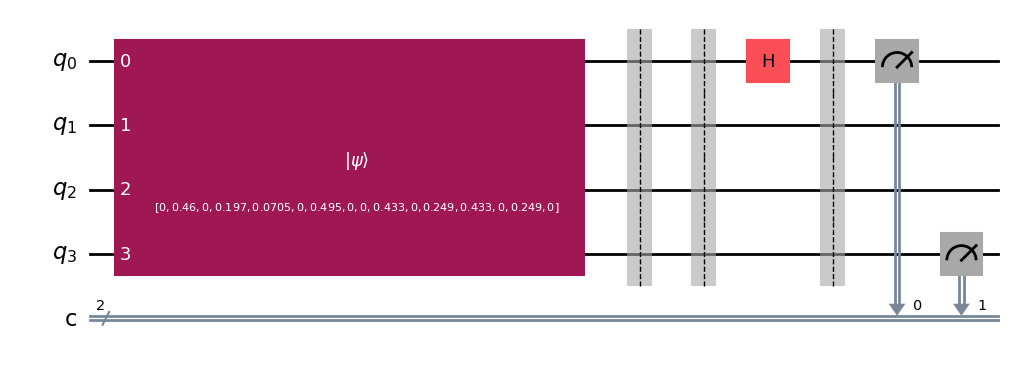

In [ ]:
# Draw circuit with matplotlib
print("\\nQuantum Circuit Diagram:")
print("="*60)

# Configure matplotlib for better quality
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12

# Draw circuit with enhanced styling
fig = qc.draw(output='mpl', 
              scale=1.2,
              fold=-1,
              idle_wires=False)

# Save circuit diagram
os.makedirs('../Figures', exist_ok=True)
fig.savefig('../Figures/quantum_circuit_4qubit.pdf', bbox_inches='tight', dpi=300)
fig.savefig('../Figures/quantum_circuit_4qubit.png', bbox_inches='tight', dpi=300)

print("✓ Circuit diagram saved to Figures/")
print("="*60)

print("\\nCircuit Specification:")
print("  ✓ 4 qubits (q0: ancilla, q1-q2: features, q3: label)")
print("  ✓ 1 Hadamard gate (on q0 only)")
print("  ✓ 2 measurements (q0 for post-selection, q3 for classification)")
print("  ✓ State initialized with 16-element amplitude vector (α=1/√4)")
print("  ✓ Statevector analysis (before/after Hadamard)")

# Display the circuit
fig